# EDA of Real Personal Consumption Expenditures

The data set I am using to predict the prices of vehicle does not have many variables to work with. In an attempt to get more information into the data I have decided to pull a Personal Consumption Expenditure (PCE) data set from the Federal Reserve Bank of St.Louis (https://fred.stlouisfed.org/series/PCEC96). My hopes are that I can use this data merged on the date of sale from the BMW pricing data, to gain more insights on consumer behavior as hopefully this information will represent how consumer spend. The hypothesis is if consumers are spending more then their willingness to pay for a vehicle will be higher. Given that the BMW data is of second hand cars (rather than new and more luxury), the types of buyers which make up the majority of the data set would be represented.

## PCE Data Analysis

Here I will ingest the PCE data and merge the PCE value by month to the sale dates from the BMW dataset.

In [43]:
# Load the BMW pricing dataset
bmw_data = pd.read_csv('./data/bmw_pricing_challenge.csv')

# Load the consumer spending data (example: PCE data from FRED)
pce_data = pd.read_csv('./data/PCEC96.csv')  # Ensure this file has date and spending columns


In [23]:
bmw_data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [24]:
pce_data.head()

,DATE,PCEC96
0,2007-01-01,11181.0
1,2007-02-01,11178.2
2,2007-03-01,11190.7
3,2007-04-01,11201.5
4,2007-05-01,11218.0


In [28]:
bmw_data['sold_at'] = pd.to_datetime(bmw_data['sold_at'])

# Print all unique sale dates
unique_dates = bmw_data['sold_at'].unique()
print("Unique Sale Dates:")
for date in unique_dates:
    print(date)

Unique Sale Dates:
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-04-01 00:00:00
2018-03-01 00:00:00
2018-09-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00


In [29]:
# Convert 'date' to datetime
pce_data['DATE'] = pd.to_datetime(pce_data['DATE'])

# Filter PCE data for 2018
pce_data_2018 = pce_data[pce_data['DATE'].dt.year == 2018]

In [30]:
pce_data_2018

,DATE,PCEC96
132,2018-01-01,13541.3
133,2018-02-01,13547.3
134,2018-03-01,13586.5
135,2018-04-01,13598.7
136,2018-05-01,13640.5
137,2018-06-01,13653.7
138,2018-07-01,13682.7
139,2018-08-01,13711.5
140,2018-09-01,13687.1
141,2018-10-01,13727.1


In [32]:
bmw_data['year_month'] = bmw_data['sold_at'].dt.to_period('M')
pce_data_2018['year_month'] = pce_data_2018['DATE'].dt.to_period('M')

C:\Users\alala\AppData\Local\Temp\ipykernel_30544\1171183567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pce_data_2018['year_month'] = pce_data_2018['DATE'].dt.to_period('M')


In [33]:
pce_data_2018

,DATE,PCEC96,year_month
132,2018-01-01,13541.3,2018-01
133,2018-02-01,13547.3,2018-02
134,2018-03-01,13586.5,2018-03
135,2018-04-01,13598.7,2018-04
136,2018-05-01,13640.5,2018-05
137,2018-06-01,13653.7,2018-06
138,2018-07-01,13682.7,2018-07
139,2018-08-01,13711.5,2018-08
140,2018-09-01,13687.1,2018-09
141,2018-10-01,13727.1,2018-10


In [34]:
# Merge datasets on year_month
merged_data = pd.merge(bmw_data, pce_data_2018, on='year_month', how='left')

# Print the first few rows of the merged data to verify
print(merged_data.head())

  maker_key model_key  mileage  engine_power registration_date    fuel  \
0       BMW       118   140411           100        2012-02-01  diesel   
1       BMW        M4    13929           317        2016-04-01  petrol   
2       BMW       320   183297           120        2012-04-01  diesel   
3       BMW       420   128035           135        2014-07-01  diesel   
4       BMW       425    97097           160        2014-12-01  diesel   

  paint_color     car_type  feature_1  feature_2  ...  feature_4  feature_5  \
0       black  convertible       True       True  ...      False       True   
1        grey  convertible       True       True  ...      False      False   
2       white  convertible      False      False  ...      False       True   
3         red  convertible       True       True  ...      False       True   
4      silver  convertible       True       True  ...      False      False   

   feature_6  feature_7  feature_8  price    sold_at year_month       DATE  \
0 

Here we will quickly look at the correlation between the price of a vehicle and the PCE data information on spending.

In [36]:
# Perform correlation analysis between spending and price
correlation = merged_data['price'].corr(merged_data['PCEC96'])

print(f"Correlation between consumer spending and vehicle prices: {correlation}")


Correlation between consumer spending and vehicle prices: 0.01497533721295159


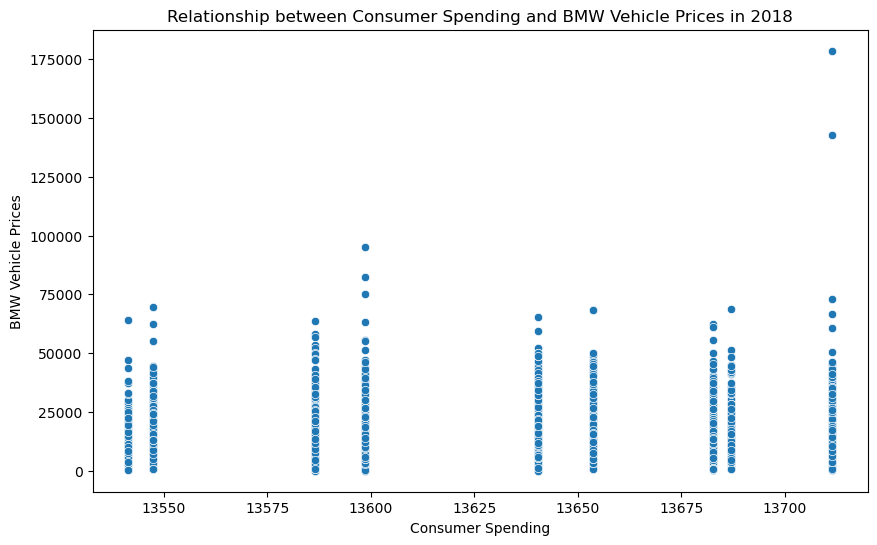

In [38]:
# Visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCEC96', y='price', data=merged_data)
plt.title('Relationship between Consumer Spending and BMW Vehicle Prices in 2018')
plt.xlabel('Consumer Spending')
plt.ylabel('BMW Vehicle Prices')
plt.show()

The correlation coefficient you obtained indicates a very weak linear relationship between consumer spending and BMW vehicle prices. The scatter plot appears as discrete points along the x-axis, as the consumer spending data has limited unique values / is aggregated monthly in a way that doesn't show much variability.